[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sarah1123/SciComp-F22-AM111/blob/main/07_root_finding/Class07RootFinding.ipynb)

In [2]:
%%time
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 

CPU times: user 3.39 s, sys: 794 ms, total: 4.19 s
Wall time: 9.07 s


In [4]:
# Functions
def f1(x):
    y = x**2-x-6
    return y

def f2(x):
    y = x**3 - x**2
    return y

def f3(x):
    y = x**3 - 2*x**2 +(4/3)*x -8/27
    return y

def f4(x):
    y = x - 2**(-x)
    return y

In [10]:
# Derivatives
def df1(x):
    y = 2*x-1;
    return y

def df2(x):
    y = 3*x**2 - 2*x;
    return y

def df3(x):
    y = 3*x**2 - 4*x + 4/3;
    return y

def df4(x):
    y = 1 + log(2)*2**(-x);
    return y

In [21]:
# Bisection method
#
a = 2   # initial interval for root
b = 5   # initial interval for root
N = 10  # number of iterations
i = 0
C  = np.zeros(N); # estimates of C
r = np.zeros(N); # estimates of order r

# initalize |xk-x|-type differences
diffA = 2; diffB = 2; diffC = 2
x = 2

while i<N:
    xNew  = (a+b)/2
    diffC = diffB
    diffB = diffA
    diffA = abs(xNew-x)
    x = xNew; 
    if f1(x) == 0:
        break
    if f1(a)*f1(x) > 0:
        a=x
    else:
        b=x
    r[i] = np.log(diffA/diffB)/np.log(diffB/diffC)
    C[i]  = diffA/(diffB**r[i])
    print(i,x,C[i],r[i])
    i = i+1

inf -inf
0.282347088755958 2.409420839653209
0.5 1.0
0.5 1.0
0.5 1.0
0.5 1.0
0.5 1.0
0.5 1.0
0.5 1.0
0.5 1.0


/var/folders/q5/y48_vpwj329g7c88vsybqgvw0000gn/T/ipykernel_75981/1604123407.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  r[i] = np.log(diffA/diffB)/np.log(diffB/diffC);
/var/folders/q5/y48_vpwj329g7c88vsybqgvw0000gn/T/ipykernel_75981/1604123407.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  C[i]  = diffA/(diffB**r[i]);


<Figure size 432x288 with 0 Axes>

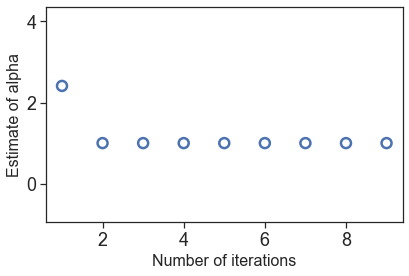

In [19]:
# Sample plot
#
from matplotlib import rc
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import seaborn
seaborn.set(style='ticks')

fig = plt.figure() 
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', titlesize=18)

# Create an axes instance
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.scatter(range(N),alpha,s=100,linewidths=2.5, facecolors='none', edgecolors='b')
ax.axis('equal')
plt.xlabel('Number of iterations', size = 16)
plt.ylabel('Estimate of alpha', size = 16); 
# plt.savefig('test.png',transparent=True)  
plt.show()

In [20]:
# Newton's method
#
x     = 0        # initial guess for root
N     = 10       # number of iterations
C  = np.zeros(N) # estimates of lambda
r = np.zeros(N)  # estimates of order alpha
i     = 0
# initalize |pn-p|-type differences
diffA, diffB, diffC = 2, 2, 2

while i<N:
    xNew  = x-f1(x)/df1(x) # Newton's method
    diffC = diffB
    diffB = diffA
    diffA = abs(xNew-x)
    x     = xNew # update root estimate
    r[i]  = np.log(diffA/diffB)/np.log(diffB/diffC)
    C[i]  = diffA/(diffB**r[i])
    print(i,x,C[i],r[i])
    i     = i+1

0 -6.0 0.0 inf
1 -3.230769230769231 9.772653001316197 -0.7037877659013353
2 -2.203013481363997 0.2784882538442987 1.2819516332680758
3 -2.007623800972449 0.18663252497308871 1.6748892519066119
4 -2.0000115891269745 0.1852077560223605 1.9548039422643921
5 -2.0000000000268616 0.19908718940161643 1.9990631687120175
6 -2.0 0.19999739183188311 1.9999982769025637
7 -2.0 nan inf


/var/folders/q5/y48_vpwj329g7c88vsybqgvw0000gn/T/ipykernel_75981/2225763521.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  r[i] = np.log(diffA/diffB)/np.log(diffB/diffC);
/var/folders/q5/y48_vpwj329g7c88vsybqgvw0000gn/T/ipykernel_75981/2225763521.py:17: RuntimeWarning: divide by zero encountered in log
  r[i] = np.log(diffA/diffB)/np.log(diffB/diffC);
/var/folders/q5/y48_vpwj329g7c88vsybqgvw0000gn/T/ipykernel_75981/2225763521.py:18: RuntimeWarning: invalid value encountered in double_scalars
  C[i]  = diffA/(diffB**r[i]);


ZeroDivisionError: float division by zero

In [22]:
# Secant method
#
x     = 2        # initial guess 1 for root
xOld  = 2.5      # initial guess 2 for root
N     = 10       # number of iterations
C  = np.zeros(N) # estimates of C
r = np.zeros(N)  # estimates of order r
i     = 0
# initalize |xn-x|-type differences
diffA, diffB, diffC = 2, 2, 2

while i<N:
    q    = f1(x)
    qOld = f1(xOld)
    xNew = x-q*(x-xOld)/(q-qOld) # Secant method
    diffC = diffB
    diffB = diffA
    diffA = abs(xNew-x)
    xOld  = x
    x     = xNew # update root estimate
    r[i]  = np.log(diffA/diffB)/np.log(diffB/diffC)
    C[i]  = diffA/(diffB**r[i])
    #print(i,x,C[i],r[i]);
    print(C[i],r[i])
    i     = i+1

inf -inf
0.11369060817278044 3.329460092761372
0.1573815133502217 0.8941370047142863
1.3248374877542113 2.125788830275385
0.11466352084798608 1.4051502969581708
1.010392350228528 1.7188363535167348
0.18863719882541435 1.5779653647657021
nan inf


/var/folders/q5/y48_vpwj329g7c88vsybqgvw0000gn/T/ipykernel_75981/549143026.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  r[i] = np.log(diffA/diffB)/np.log(diffB/diffC);
/var/folders/q5/y48_vpwj329g7c88vsybqgvw0000gn/T/ipykernel_75981/549143026.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  C[i]  = diffA/(diffB**r[i]);
/var/folders/q5/y48_vpwj329g7c88vsybqgvw0000gn/T/ipykernel_75981/549143026.py:21: RuntimeWarning: divide by zero encountered in log
  r[i] = np.log(diffA/diffB)/np.log(diffB/diffC);
/var/folders/q5/y48_vpwj329g7c88vsybqgvw0000gn/T/ipykernel_75981/549143026.py:22: RuntimeWarning: invalid value encountered in double_scalars
  C[i]  = diffA/(diffB**r[i]);


ZeroDivisionError: float division by zero